### 1

In [36]:
! pip install pyomo

In [37]:
from pyomo.environ import *

In [38]:
%%capture
import sys
import os

if 'google.colab' in sys.modules:
    !pip install idaes-pse --pre
    !idaes get-extensions --to ./bin
    os.environ['PATH'] += ':bin'

In [39]:
!apt-get install -y -qq glpk-utils

In [40]:
model = ConcreteModel()

model.x1 = Var(within=NonNegativeReals)
model.x2 = Var(within=NonNegativeReals)

model.obj = Objective(expr=model.x1 + 2 * model.x2, sense=minimize)

model.con1 = Constraint(expr=3 * model.x1 + 4 * model.x2 >= 1)
model.con2 = Constraint(expr=2 * model.x1 + 5 * model.x2 >= 2)

solver = SolverFactory('glpk',executable='/usr/bin/glpsol')
results = solver.solve(model)

print("Результаты:")
print("x1 =", model.x1())
print("x2 =", model.x2())
print("Значение целевой функции =", model.obj())

Результаты:
x1 = 0.0
x2 = 0.4
Значение целевой функции = 0.8


### 2


In [41]:
from random import uniform
from pyomo import environ as pyo

# Генерация случайных данных
m = 4
n = 5
a_data = {(i, j): uniform(1, 50) for i in range(1, n + 1) for j in range(1, m + 1)}
b_data = {i: uniform(1, 50) for i in range(1, n + 1)}
c_data = {j: uniform(1, 50) for j in range(1, m + 1)}

# Создание модели
model = pyo.ConcreteModel()

# Параметры модели
model.m = pyo.Param(initialize=m, within=pyo.NonNegativeIntegers)
model.n = pyo.Param(initialize=n, within=pyo.NonNegativeIntegers)
model.I = pyo.RangeSet(1, model.n)
model.J = pyo.RangeSet(1, model.m)
model.a = pyo.Param(model.I, model.J, initialize=a_data)
model.b = pyo.Param(model.I, initialize=b_data)
model.c = pyo.Param(model.J, initialize=c_data)
model.x = pyo.Var(model.J, domain=pyo.NonNegativeReals)

# Целевая функция
def obj_expression(model):
    return sum(model.c[j] * model.x[j] for j in model.J)
model.OBJ = pyo.Objective(rule=obj_expression)

# Ограничения
def ax_constraint_rule(model, i):
    return sum(model.a[i, j] * model.x[j] for j in model.J) >= model.b[i]
model.AxbConstraint = pyo.Constraint(model.I, rule=ax_constraint_rule)

In [42]:
# Решение модели
model.AxbConstraint = pyo.Constraint(model.I, rule=ax_constraint_rule)
solver = pyo.SolverFactory('clp')
solver.solve(model, tee=True)

# Вывод результатов
print("Решение:")
for j in model.J:
    print(f"x[{j}] = {pyo.value(model.x[j])}")
print("Значение целевой функции:", pyo.value(model.OBJ))

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


Coin LP version 1.17.8, build Jun  7 2023
command line - /content/bin/clp /tmp/tmpofu23s1h.pyomo.nl -AMPL 
CLP 1.17.8: Решение:
x[1] = 0.46297196307712024
x[2] = 0.0
x[3] = 0.0
x[4] = 1.048269164224969
Значение целевой функции: 51.725722099224285


In [43]:
# Решение модели
solver = SolverFactory('glpk',executable='/usr/bin/glpsol')
results = solver.solve(model)

# Вывод результатов
print("Решение:")
for j in model.J:
    print(f"x[{j}] = {pyo.value(model.x[j])}")
print("Значение целевой функции:", pyo.value(model.OBJ))

Решение:
x[1] = 0.46297196307712
x[2] = 0.0
x[3] = 0.0
x[4] = 1.04826916422497
Значение целевой функции: 51.7257220992243


###3


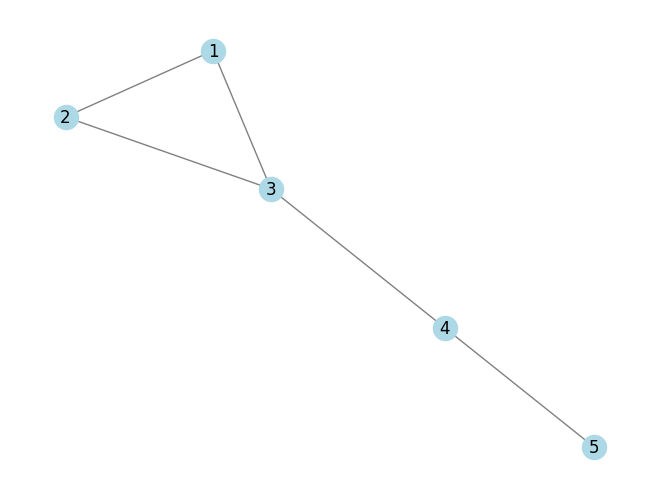

In [44]:
import networkx as nx
import matplotlib.pyplot as plt

# Создаем граф
G = nx.Graph()

# Добавляем вершины
G.add_nodes_from([1, 2, 3, 4, 5])

# Добавляем ребра
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (4, 5)])

# Строим граф
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')

# Отображаем граф
plt.show()


In [45]:
# Вызываем функцию для раскраски графа
colors = nx.greedy_color(G)

# Находим минимальное число цветов
min_colors = max(colors.values()) + 1

print("Минимальное число цветов:", min_colors)

Минимальное число цветов: 3


In [46]:
import numpy as np
adjacency_matrix = nx.adjacency_matrix(G)
E = adjacency_matrix.toarray()
print("Матрица смежности графа:")
print(E)

Матрица смежности графа:
[[0 1 1 0 0]
 [1 0 1 0 0]
 [1 1 0 1 0]
 [0 0 1 0 1]
 [0 0 0 1 0]]


In [47]:
!apt-get install -y -qq glpk-utils

In [48]:
# Создаем модель
model = ConcreteModel()

# Определяем параметры
V = [1, 2, 3, 4, 5]  # Вершины графа
C = [1, 2, 3]  # Цвета

# Определяем переменные
model.X = Var(V, C, within=Binary)

# Определяем целевую функцию
model.y = Var()

# Определяем ограничения
model.constraints = ConstraintList()
for v in V:
    model.constraints.add(sum(model.X[v, c] for c in C) == 1)  # Сумма X[v, c] = 1 для каждой вершины v

for v in V:
    for c in C:
        for u in V:
            if u != v:
                model.constraints.add(model.X[v, c] + model.X[u, c] <= 1)  # X[v, c] + X[u, c] <= 1 для всех v, u и c

for v in V:
    for c in C:
        model.constraints.add(model.y >= c * model.X[v, c])  # y >= c * X[v, c] для всех v и c

# Определяем целевую функцию
model.objective = Objective(expr=model.y, sense=minimize)

# Решаем задачу
solver = SolverFactory('glpk',executable='/usr/bin/glpsol')
results = solver.solve(model)

# Получаем минимальное количество цветов
min_colors = len(C)
for v in V:
    for c in C:
        if model.X[v, c].value == 1:
            min_colors = min(min_colors, c)

print("Минимальное количество цветов:", min_colors)

Минимальное количество цветов: 3


###4

In [49]:
!pip install clp

In [50]:
%%capture
import sys
import os
import pyomo.environ as pyo
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
if 'google.colab' in sys.modules:
    !pip install idaes-pse --pre
    !idaes get-extensions --to ./bin
    os.environ['PATH'] += ':bin'

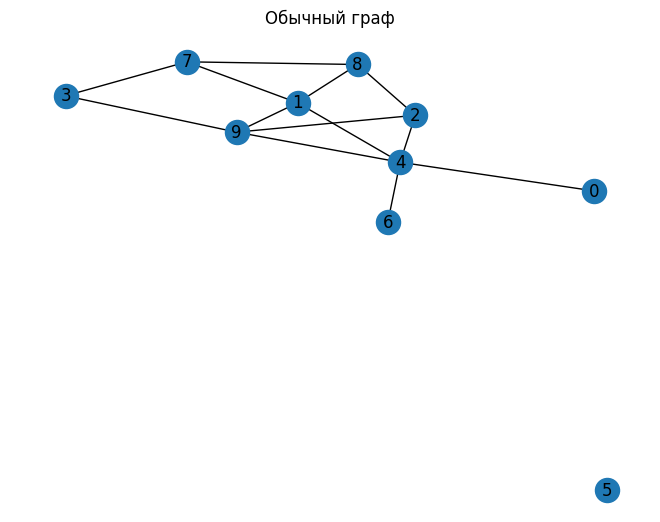

In [51]:
G = nx.Graph()
G.add_nodes_from(range(10))

for i in range(10):
    for j in range(i + 1, 10):
        if random.random() < 0.3:
            G.add_edge(i, j)

coloring = {}
nodes = sorted(G.nodes(), key=lambda x: -len(list(G.neighbors(x))))
for node in nodes:
    neighbors = set(G.neighbors(node))
    neighbor_colors = {coloring[n] for n in neighbors if n in coloring}
    for color in range(len(neighbors) + 1):
        if color not in neighbor_colors:
            coloring[node] = color
            break

node_colors = [coloring[node] for node in G.nodes()]
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=300)
plt.title("Обычный граф")
plt.show()

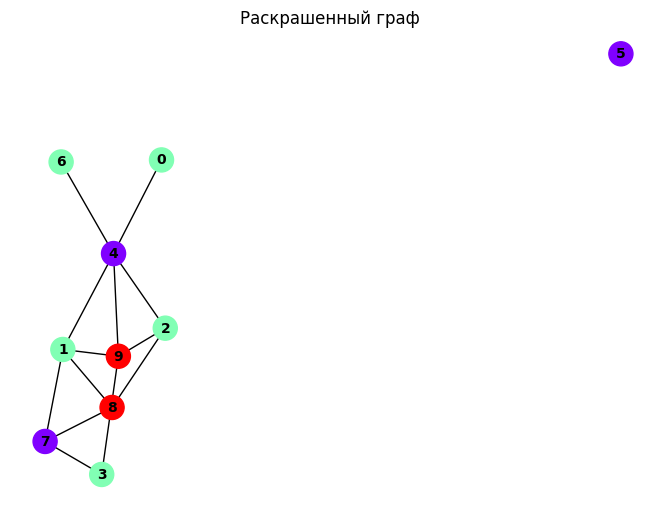

In [52]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=300, node_color=node_colors, cmap=plt.cm.rainbow, font_size=10, font_color='black', font_weight='bold')
plt.title("Раскрашенный граф")
plt.show()


In [53]:
adjacency_matrix = nx.adjacency_matrix(G).toarray()


model = ConcreteModel()
vertices = list(G.nodes())
colors = list(set(node_colors))
model.x = Var(vertices, colors, within=Binary)

def one_color_rule(model, v, c):
    return sum(model.x[v, c] for c in colors) == 1
model.one_color_constraint = Constraint(vertices, colors, rule=one_color_rule)

def adjacent_colors_rule(model, u, v):
    return sum(model.x[u, c] + model.x[v, c] for c in colors) <= 1
model.adjacent_colors_constraint = Constraint(G.edges(), rule=adjacent_colors_rule)
color_matrix = np.zeros((len(vertices), len(colors)), dtype=int)
for v in vertices:
    for idx, c in enumerate(colors):
        if model.x[v, c].value is not None:
            color_matrix[v, idx] = int(model.x[v, c].value)
Y = len(list(G.nodes()))
print(Y)

def objective_rule(model):
    return sum(1 for v in vertices)
print(objective_rule(model))
model.objective = Objective(rule=objective_rule, sense=minimize)

# Решаем задачу
solver = SolverFactory('clp')
results = solver.solve(model)

10
10


  - termination condition: infeasible
  - message from solver: CLP 1.17.8 infeasible, objective 10; 17 iterations


In [54]:
print("Результат оптимизации:")
for v in vertices:
    for c in colors:
        if model.x[v, c].value == 1:
            print(f"Вершина {v} покрашена в цвет {c}")

Результат оптимизации:
Вершина 0 покрашена в цвет 1
Вершина 1 покрашена в цвет 1
Вершина 2 покрашена в цвет 0
Вершина 5 покрашена в цвет 2
Вершина 6 покрашена в цвет 2
Вершина 7 покрашена в цвет 0
Вершина 9 покрашена в цвет 0


In [55]:
color_matrix = np.zeros((len(vertices), len(colors)), dtype=int)
for v in vertices:
    for idx, c in enumerate(colors):
        color_matrix[v, idx] = int(model.x[v, c].value)

print("Матрица смежностей:\n",adjacency_matrix)

Матрица смежностей:
 [[0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 1 1 1]
 [0 0 0 0 1 0 0 0 1 1]
 [0 0 0 0 0 0 0 1 0 1]
 [1 1 1 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 1 0]
 [0 1 1 0 0 0 0 1 0 0]
 [0 1 1 1 1 0 0 0 0 0]]


In [56]:
print("Матрица цветов:\n", color_matrix)

Матрица цветов:
 [[0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 0]
 [1 0 0]]


In [57]:
print("Y = ", len(set(node_colors)))

Y =  3
